In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize
%matplotlib inline

# plot a b 

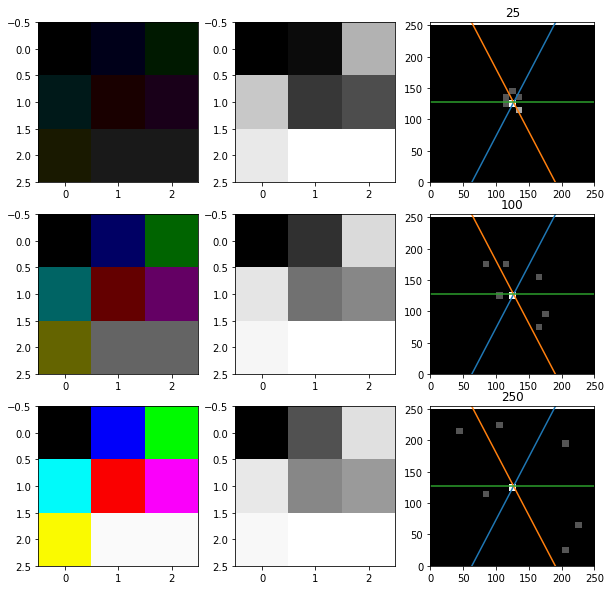

In [32]:
edge = np.arange(0,255,10)
plt.figure(figsize=(10,10))
j =1
for i in [25,100,250]:
    img = np.array([[[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1],[1,1,1]]])
    img = np.reshape(img.astype(np.uint8),(3,3,3))
    img = img*i
    plt.subplot(3,3,j)
    j += 1
    plt.imshow(img)
    img_lab = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2LAB)
    L = img_lab[:,:,0]
    a = img_lab[:,:,1]
    b = img_lab[:,:,2]
    plt.subplot(3,3,j)
    j += 1
    plt.imshow(L,'gray')
    plt.subplot(3,3,j)
    j += 1
    h = plt.hist2d(a.flatten(),b.flatten(),bins=edge,cmap='gray')
    plt.plot(b1)
    plt.plot(b2)
    plt.plot(b3)
    plt.ylim(0,255)
    plt.title(i)

# spilt a b into RGBC

In [3]:
def ab_RGBC(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    s = 2 # K limit
    for i in range(h):
        for j in range(w):
            ai = a[i,j]
            bi = b[i,j]
            if ai>127+s and bi>127+s:
                y[i,j] = 1 #R
            elif ai<127-s and bi>127+s:
                y[i,j] = 2 #G
            elif ai>127+s and bi<127-s:
                y[i,j] = 3 #B
            elif ai<127-s and bi<127-s:
                y[i,j] = 4 #C
            else:
                y[i,j] = 0
    return y

In [17]:
def RGBC_img(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            yi = y[i,j]
            if yi == 1: # R
                a[i,j] = 200
                b[i,j] = 200
            elif yi == 2: # G
                a[i,j] = 50
                b[i,j] = 200
            elif yi == 3: # B
                a[i,j] = 200
                b[i,j] = 50
            elif yi == 4: # C
                a[i,j] = 50
                b[i,j] = 50
            else:
                a[i,j] = 127
                b[i,j] =127
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [41]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = ab_RGBY(a,b)
        Y.append(y)
        X.append(L)

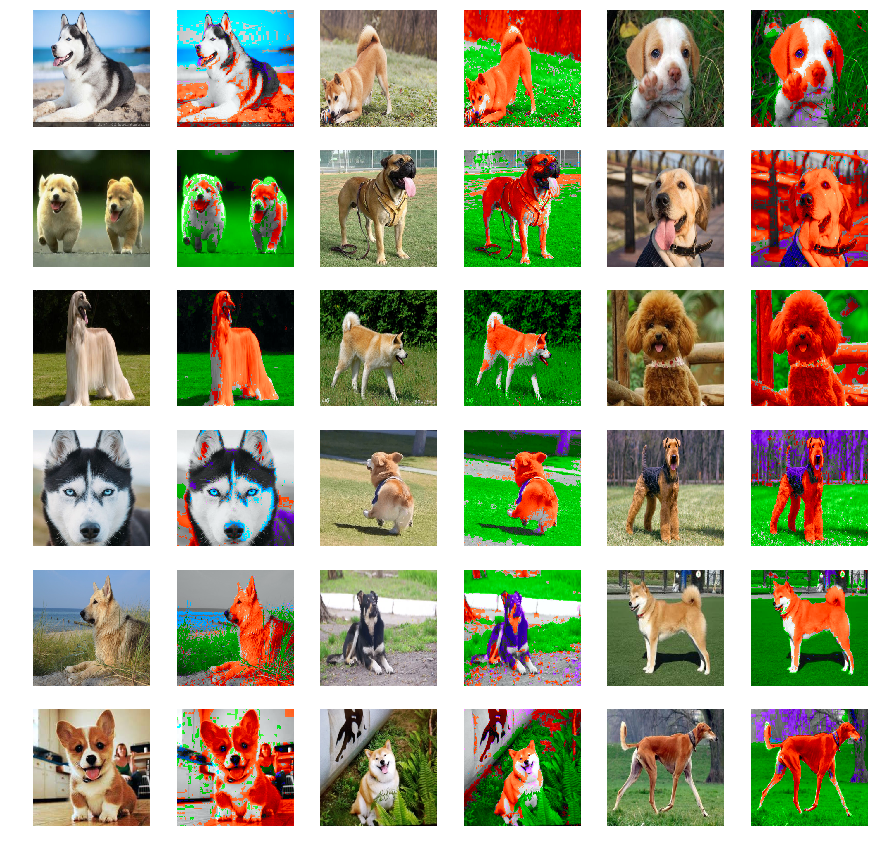

In [42]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = RGBC_img(X[i],Y[i])
    plt.imshow(img_re)
    plt.axis('OFF')

# spilt a b into RGBCMYK

In [26]:
def ab_RGBCMYK(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    s = 5 # K limit
    for i in range(h):
        for j in range(w):
            ai = a[i,j]
            bi = b[i,j]
            if bi>127+s:
                if 2*ai>bi+127:
                    y[i,j] = 1 #R
                elif 2*ai<-bi+3*127:
                    y[i,j] = 2 #G
                else:
                    y[i,j] = 6 #y
            elif bi<127-s:
                if 2*ai<bi+127:
                    y[i,j] = 4 #C
                elif 2*ai>-bi+3*127:
                    y[i,j] = 5 #M
                else:
                    y[i,j] = 3 #B
            else:
                y[i,j] = 0
    return y

In [7]:
def RGBCMYK_img(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            yi = y[i,j]
            if yi == 1: # R
                a[i,j] = 200
                b[i,j] = 200
            elif yi == 2: # G
                a[i,j] = 50
                b[i,j] = 200
            elif yi == 3: # B
                a[i,j] = 127
                b[i,j] = 50
            elif yi == 4: # C
                a[i,j] = 50
                b[i,j] = 50
            elif yi == 5: # M
                a[i,j] = 200
                b[i,j] = 50
            elif yi == 6: # Y
                a[i,j] = 127
                b[i,j] = 200
            else: # K
                a[i,j] = 127
                b[i,j] =127
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [27]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = ab_RGBCMYK(a,b)
        Y.append(y)
        X.append(L)

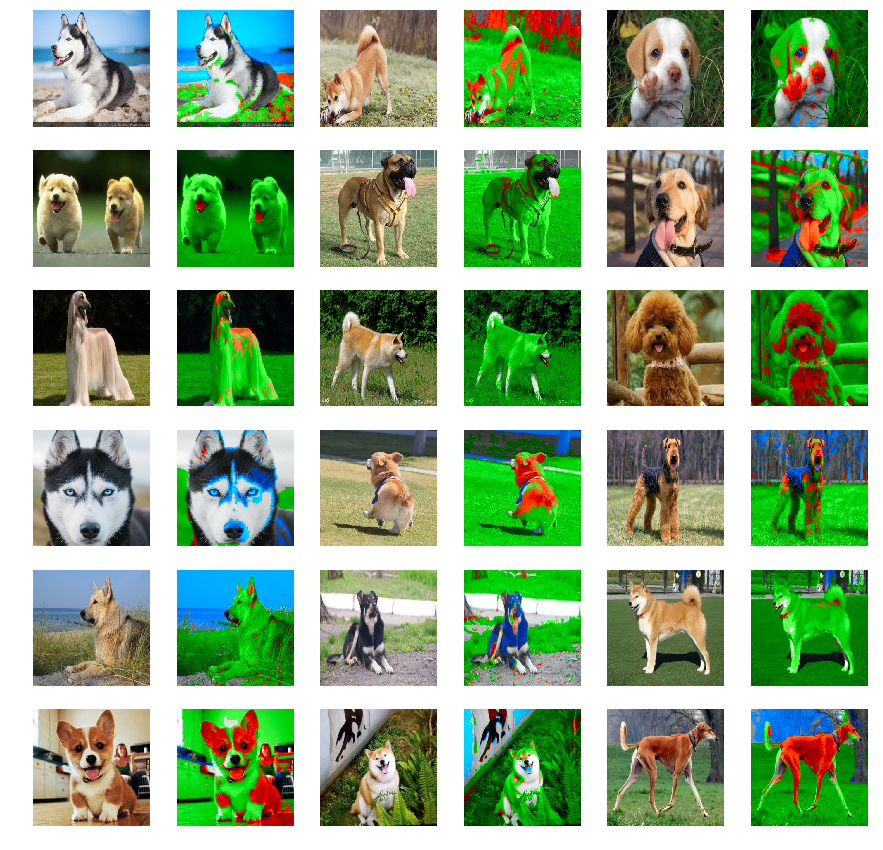

In [28]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = RGBCMYK_img(X[i],Y[i])
    plt.imshow(img_re)
    plt.axis('OFF')

(-0.5, 442.5, 416.5, -0.5)

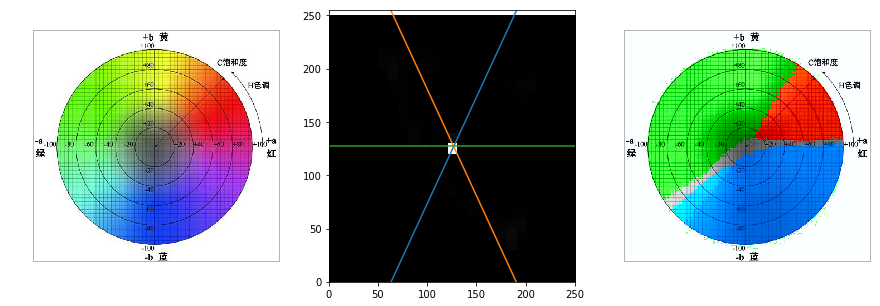

In [49]:
img1 = cv2.imread('rgb.jpg')
# img1 = img_all[1]
img1_lab = cv2.cvtColor(img1.astype(np.uint8), cv2.COLOR_BGR2LAB)
L = img1_lab[:,:,0]
a = img1_lab[:,:,1]
b = img1_lab[:,:,2]
y = ab_RGBCMYK(a,b)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.axis('OFF')
plt.subplot(1,3,2)
edge = np.arange(0,255,10)
plt.hist2d(a.flatten(),b.flatten(),bins=edge,cmap='gray')
plt.plot(b1)
plt.plot(b2)
plt.plot(b3)
plt.ylim(0,255)
plt.subplot(1,3,3)
img_re = RGBCMYK_img(L,y)
plt.imshow(img_re)
plt.axis('OFF')

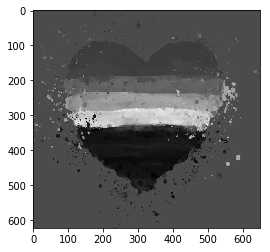

In [42]:
plt.imshow(b/a,'gray')

(0, 255)

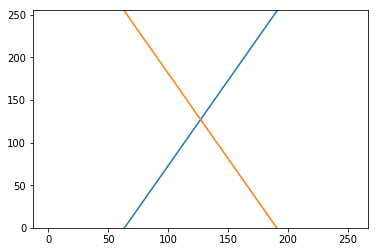

In [5]:
a = np.arange(0,255)
b1 = 2*a-127
b2 = -2*a+3*127
plt.plot(b1)
plt.plot(b2)
plt.ylim(0,255)

# split a b into 3 by 3 block

In [60]:
def ab_block9(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    Llim = 120
    Hlim = 130
    for i in range(h):
        for j in range(w):
            ai = a[i,j]
            bi = b[i,j]
            if ai<Llim:
                if bi<Llim:
                    y[i,j] = 0
                elif bi>Hlim:
                    y[i,j] = 1
                else:
                    y[i,j] = 2
            elif ai>Hlim:
                if bi<Llim:
                    y[i,j] = 3
                elif bi>Hlim:
                    y[i,j] = 4
                else:
                    y[i,j] = 5
            else:
                if bi<Llim:
                    y[i,j] = 6
                elif bi>Hlim:
                    y[i,j] = 7
                else:
                    y[i,j] = 8
    return y

In [54]:
def block9_img(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            yi = y[i,j]
            if yi == 0: 
                a[i,j] = 50
                b[i,j] = 50
            elif yi == 1:
                a[i,j] = 50
                b[i,j] = 200
            elif yi == 2:
                a[i,j] = 50
                b[i,j] = 125
            elif yi == 3:
                a[i,j] = 200
                b[i,j] = 50
            elif yi == 4: 
                a[i,j] = 200
                b[i,j] = 200
            elif yi == 5: 
                a[i,j] = 200
                b[i,j] = 125
            elif yi == 6:
                a[i,j] = 125
                b[i,j] = 50
            elif yi == 7: 
                a[i,j] = 125
                b[i,j] = 200
            else:
                a[i,j] = 127
                b[i,j] =127
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [61]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = ab_block9(a,b)
        Y.append(y)
        X.append(L)

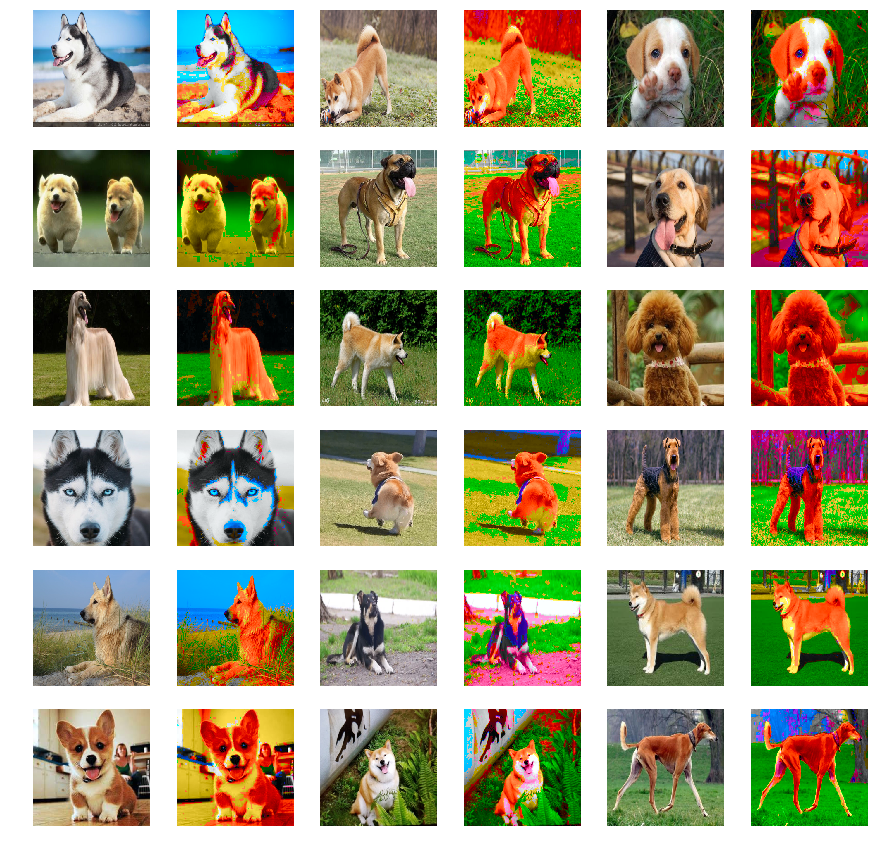

In [62]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = block9_img(X[i],Y[i])
    plt.imshow(img_re)
    plt.axis('OFF')

# Quantify a b into 8 by 8 block

In [2]:
def Q64(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            y[i,j] = 8*np.floor(a[i,j]/32)+np.floor(b[i,j]/32)
    return y

In [3]:
def deQ64(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            yi = y[i,j]
            a[i,j] = np.floor(yi/8)*32+16
            b[i,j] = (yi-8*np.floor(yi/8))*32+16
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [12]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = Q64(a,b)
        Y.append(y)
        X.append(L)

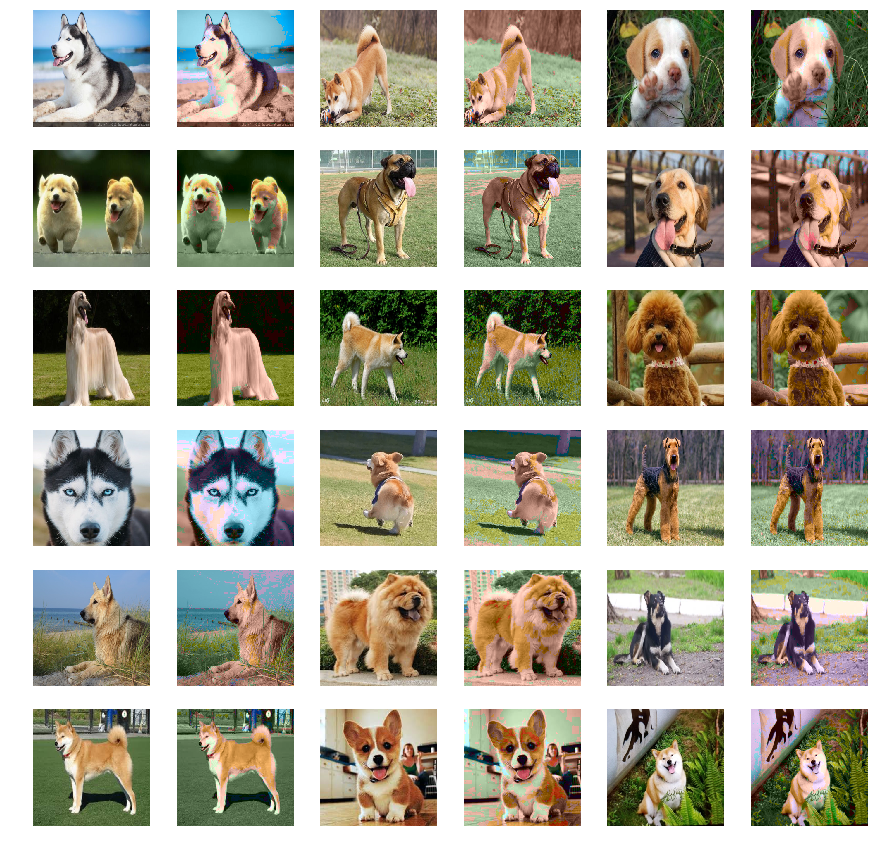

In [13]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = deQ64(X[i],Y[i])
    plt.imshow(img_re)
    plt.axis('OFF')

In [4]:
ab = np.arange(64).reshape((8,8))

In [5]:
np.flip(ab.T,0)

array([[ 7, 15, 23, 31, 39, 47, 55, 63],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 0,  8, 16, 24, 32, 40, 48, 56]])

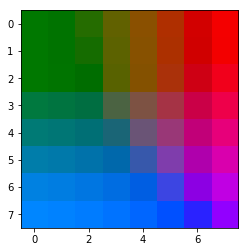

In [9]:
Xones = 100*np.ones((8,8))
imgab = deQ64(Xones,np.flip(ab.T,0))
plt.imshow(imgab)

### ideas!: code in zigzag order

# Quantify a b into 9 by 9 block and order in zigzag order

In [3]:
# define abmap
abmap = np.zeros((9,9))
m = 0
i = 0
j = 0
p = 0
for n in range(81):
    abmap[i,j]=n
    if p==0:
        if i==8:
            p=1
            j+=1
            m=1
        elif m==0:#go down
            if j==0:
                i+=1
                m=1 
            else:
                i+=1
                j-=1
        else:#go up
            if i==0:
                j+=1
                m=0
            else:
                i-=1
                j+=1  
    else:
        if m==0:#go down
            if i==8:
                j+=1
                m=1 
            else:
                i+=1
                j-=1
        else:#go up
            if j==8:
                i+=1
                m=0
            else:
                i-=1
                j+=1  
abmap

array([[  0.,   2.,   3.,   9.,  10.,  20.,  21.,  35.,  36.],
       [  1.,   4.,   8.,  11.,  19.,  22.,  34.,  37.,  52.],
       [  5.,   7.,  12.,  18.,  23.,  33.,  38.,  51.,  53.],
       [  6.,  13.,  17.,  24.,  32.,  39.,  50.,  54.,  65.],
       [ 14.,  16.,  25.,  31.,  40.,  49.,  55.,  64.,  66.],
       [ 15.,  26.,  30.,  41.,  48.,  56.,  63.,  67.,  74.],
       [ 27.,  29.,  42.,  47.,  57.,  62.,  68.,  73.,  75.],
       [ 28.,  43.,  46.,  58.,  61.,  69.,  72.,  76.,  79.],
       [ 44.,  45.,  59.,  60.,  70.,  71.,  77.,  78.,  80.]])

In [4]:
def Q81z(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            mapi = int(np.floor(a[i,j]/29))
            mapj = int(np.floor(b[i,j]/29))
            y[i,j] = abmap[mapi,mapj]        
    return y

In [5]:
def deQ81z(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            ai,bi = np.where(y[i,j]==abmap) 
            a[i,j] = ai*29+14
            b[i,j] = bi*29+14
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [6]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = Q81z(a,b)
        Y.append(y)
        X.append(L)

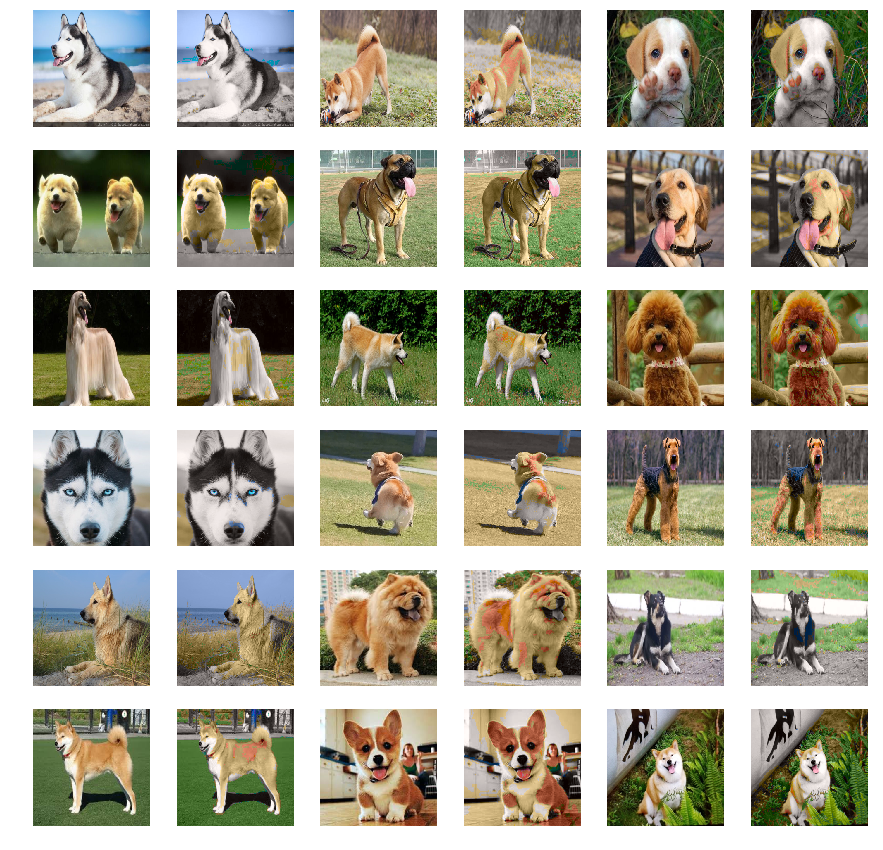

In [7]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = deQ81z(X[i],Y[i])
    plt.imshow(img_re)
    plt.axis('OFF')

[[  0.   2.   3.   9.  10.  20.  21.  35.  36.]
 [  1.   4.   8.  11.  19.  22.  34.  37.  52.]
 [  5.   7.  12.  18.  23.  33.  38.  51.  53.]
 [  6.  13.  17.  24.  32.  39.  50.  54.  65.]
 [ 14.  16.  25.  31.  40.  49.  55.  64.  66.]
 [ 15.  26.  30.  41.  48.  56.  63.  67.  74.]
 [ 27.  29.  42.  47.  57.  62.  68.  73.  75.]
 [ 28.  43.  46.  58.  61.  69.  72.  76.  79.]
 [ 44.  45.  59.  60.  70.  71.  77.  78.  80.]]


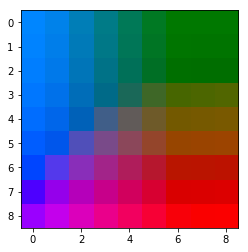

In [8]:
Xones = 100*np.ones((9,9))
imgab = deQ81z(Xones,abmap)
print(abmap)
plt.imshow(imgab)

In [10]:
Y[i].shape

(400, 400)